# Diversification

In [2]:
import numpy as np

rng = np.random.default_rng(8675309)

import matplotlib.pyplot as plt
import seaborn as sns

Suppose we have two assets, $i=\{1,2\}$, each with a return of $R_i$. We hold them in a portfolio with weights $\omega$ and $1-\omega$, respectively. The return on the portfolio is then

$$R_p = \omega R_1 + (1-\omega) R_2.$$

Applying the equations for expected value, we find that the expected return on the portfolio is

$$\E(R_p) = \omega \E(R_1) + (1-\omega) \E(R_2),$$

Similarly, the variance is

$$\var(R_p) = \E(R_p^2) - \E(R_p)^2.$$

The first term is 

\begin{align*}
\E(R_p^2) &= \E\left[(\omega R_1 + (1-\omega)R_2)^2\right] \\
&= \E\left[\omega^2R_1^2 + 2\omega(1-\omega)R_1 R_2 + (1-\omega)^2 R_2^2\right] \\
&= \omega^2\E(R_1^2) + 2\omega(1-\omega)\E(R_1 R_2) + (1-\omega)^2 \E(R_2^2).
\end{align*}

Similarly, the second term is

\begin{align*}
\E(R_p)^2&= \left(\omega \E(R_1) + (1-\omega) \E(R_2)\right)^2 \\
&= \omega^2 \mu_1^2 + 2\omega(1-\omega)\mu_1\mu_2 + (1-\omega)^2 \mu_2^2.
\end{align*}

Putting them together, we have

\begin{align*}
\var(R_p) &= \omega^2(\E(R_1^2)-\mu_1^2) + 2\omega(1-\omega)(\E(R_1 R_2) - \mu_1\mu_2) + (1-\omega)^2 (\E(R_2^2) - \mu_2^2) \\
&= \omega^2\var(R_1) + 2\omega(1-\omega)\cov(R_1,R_2) + (1-\omega)^2\var(R_2) \\
&= \omega^2\sigma_1^2 + 2\omega(1-\omega)\sigma_{12} + (1-\omega)^2\sigma_2^2.
\end{align*}

More generally, if we have $N$ assets with weights $\omega_i$, the variance is

$$\sigma_p^2 = \sum_{i=1}^N \omega_i^2 \sigma_i^2 + \sum_{i=1}^N\sum_{j\neq i}^N \omega_i \omega_j \sigma_{ij}.$$

In vector notation, this is simply

$$\sigma_p^2 = \boldsymbol{\omega}' \boldsymbol{\Sigma} \boldsymbol{\omega},$$

where $\boldsymbol{\omega} = (w_1, \cdots, w_N)'$ is the vector of weights, and $\boldsymbol{\Sigma}$ is the variance–covariance matrix.

:::{admonition} Exercise

For the $N=3$ case, verify that $\boldsymbol{\omega}' \boldsymbol{\Sigma} \boldsymbol{\omega}$ is the same as $\sum_{i=1}^N \omega_i^2 \sigma_i^2 + \sum_{i,j} \omega_i \omega_j \sigma_{ij}$.
:::

:::{admonition} Solution
:class: admonition-solution, dropdown

The algebra is a little tedious, but straightforward:

\begin{align*}
\sigma^2_p &= \begin{bmatrix}
\omega_1 & \omega_2 & \omega_3 \\
\end{bmatrix}
\begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \sigma_{13} \\
\sigma_{21} & \sigma_2^2 & \sigma_{23} \\
\sigma_{31} & \sigma_{32} & \sigma_3^2 \\
\end{bmatrix}
\begin{bmatrix}
\omega_1 \\ \omega_2 \\ \omega_3
\end{bmatrix} \\
&=\begin{bmatrix}
\omega_1\sigma^2_1  + \omega_2 \sigma_{21} + \omega_3 \sigma_{31} &
\omega_1 \sigma_{12} + \omega_2\sigma^2_2  + \omega_3 \sigma_{32} &
\omega_1 \sigma_{13} + \omega_2\sigma_{23}  + \omega_3 \sigma_3^2
\end{bmatrix} \begin{bmatrix}
\omega_1 \\ \omega_2 \\ \omega_3
\end{bmatrix} \\
&= \omega_1\sigma_1^2 + \omega_2\sigma_2^2 + \omega_3\sigma_3^2 + 2\omega_1\omega_2\sigma_{12} + 2\omega_1\omega_3\sigma_{13} + 2\omega_2\omega_3\sigma_{23}.
\end{align*}

Note that we're simplifying the answer using the fact that $\sigma_{ij} = \sigma_{ji}$.
:::

Consider the case an equal-weighted portfolio, where each weight is $1/N$. The variance is then

\begin{align*}
\sigma_p^2 &= \sum_{i=1}^N \left(\frac{1}{N}\right)^2 \sigma_i^2 + \sum_{i=1}^N\sum_{j\neq i}^N \left(\frac{1}{N}\right) \left(\frac{1}{N}\right) \sigma_{ij} \\
&= \frac{1}{N} \left(\frac{1}{N}\sum_{i=1}^N \sigma_i^2\right) + \left(\frac{N^2-N}{N^2}\right)\left(\frac{1}{N^2-N}\sum_{i=1}^N\sum_{j\neq i}^N \sigma_{ij}\right) \\
&= \frac{1}{N}(\text{average variance}) + \left(\frac{N-1}{N}\right)(\text{average covariance})
\end{align*}

As $N$ gets large, the first term approaches zero and the second term approaches the average of all the covariance terms. The same sort of thing happens in large portfolios even if they are not equally-weighted because each weight term will tend to be small.

:::{admonition} Key fact

When assets are held in a diversified portfolio, the variances of individual assets do not contribute meaningfully to the portfolio's variance. All that matters is the covariances of the assets.
:::

The figure below plots the volatility of all possible portfolios combining two assets with $\mu_1 = 0.1$, $\mu_2 = 0.2$, $\sigma_1=0.2$, $\sigma_2=0.3$, and $\rho = 0.2$. For some values of $\omega$, the portoflio's volatility is *less* than the volatility of either of the two assets; this is the benefit of diversification.

In [5]:
# Expected return vector
μ = np.array([0.1, 0.2])

# Volatilities and correlation
σ1 = 0.2
σ2 = 0.3
ρ = 0.2

# Calculate Σ matrix
σ12 = ρ * σ1 * σ2
Σ = np.array([[σ1**2, σ12],
              [σ12,   σ2**2]])

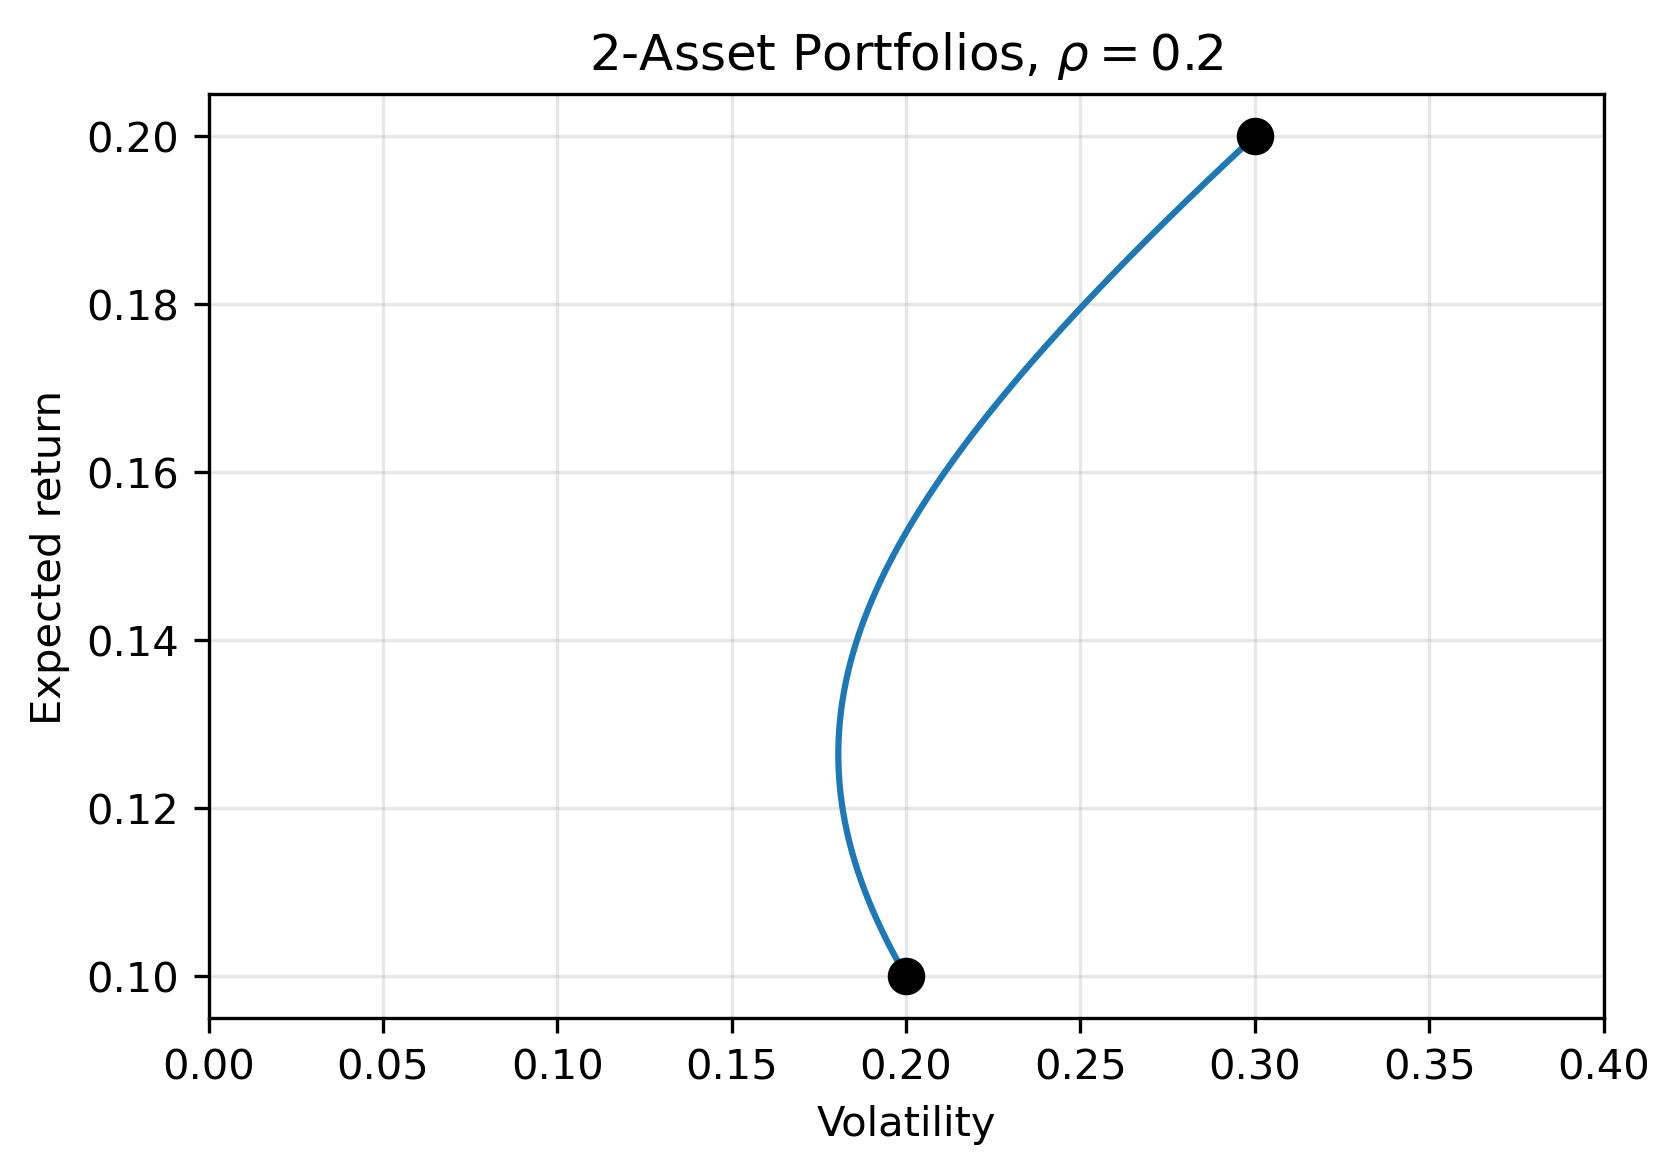

In [6]:
# Calculate return and volatility for portfolios with varying weights
prets = []
pvars = []
for w1 in np.linspace(0,1,250):
    w = np.array([w1, 1-w1])
    prets.append(w @ μ)
    pvars.append(w @ Σ @ w)
pvols = np.sqrt(np.array(pvars))

# Plot
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(pvols, prets)

# Plot original assets
R1 = (σ1, μ[0])
R2 = (σ2, μ[1])
ax.plot(*R1, 'ko', markersize=8)
ax.plot(*R2, 'ko', markersize=8)

ax.set_xlabel('Volatility')
ax.set_ylabel('Expected return')
ax.set_title(r'2-Asset Portfolios, $\rho={}$'.format(ρ))
ax.set_xlim(0,0.4)
ax.grid(alpha=0.3)
plt.show()

As we vary the correlation, the extent to which diversifcation affects the portfolio's volatility changes.

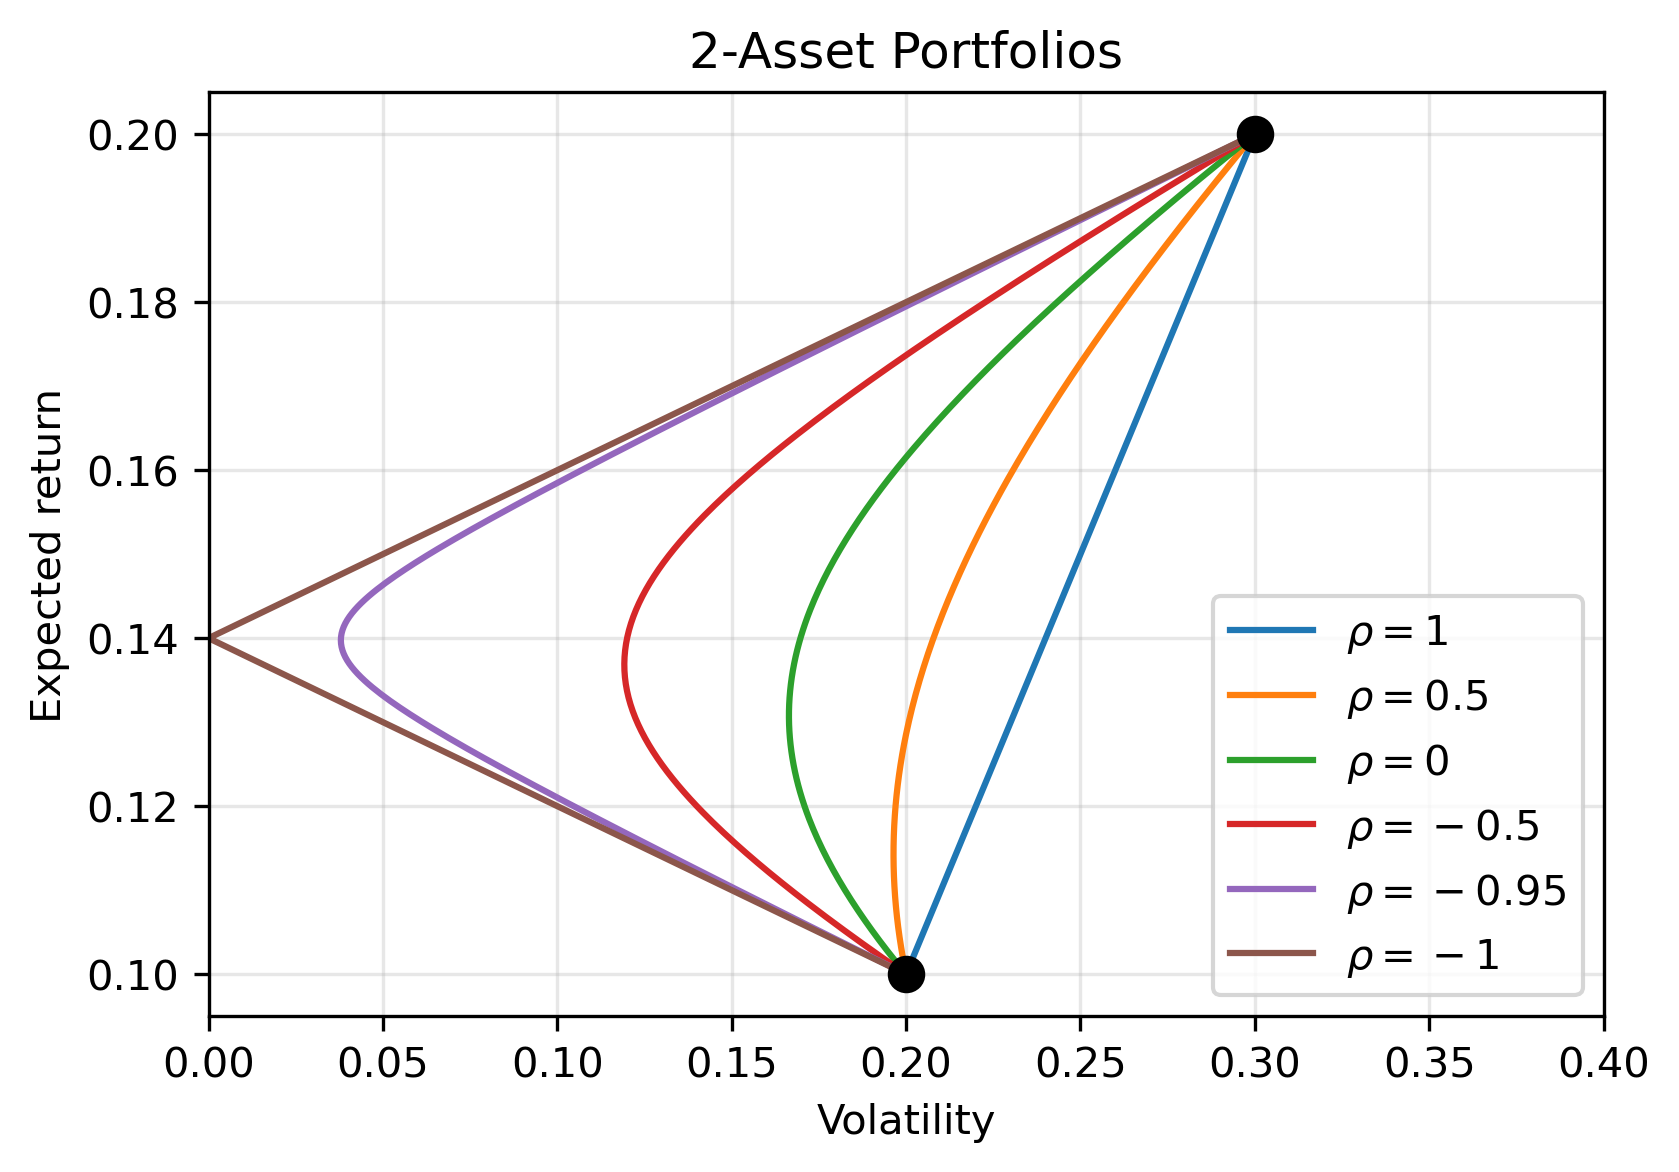

In [7]:
fig, ax = plt.subplots(figsize=(6,4))

for ρ in [1, 0.5, 0, -0.5, -0.95, -1]:

    # calculate Σ matrix
    σ12 = ρ * σ1 * σ2
    Σ = np.array([[σ1**2, σ12],
                  [σ12,   σ2**2]])

    # calculate return/volatility or portfolios
    prets = []; pvars = []
    for w1 in np.linspace(0,1,250):
        w = np.array([w1, 1-w1])
        prets.append(w @ μ)
        pvars.append(w @ Σ @ w)
    pvols = np.sqrt(np.array(pvars))
    
    ax.plot(pvols, prets, label=r'$\rho={}$'.format(ρ))

# Plot original assets
R1 = (σ1, μ[0])
R2 = (σ2, μ[1])
ax.plot(*R1, 'ko', markersize=8)
ax.plot(*R2, 'ko', markersize=8)

ax.set_xlabel('Volatility')
ax.set_ylabel('Expected return')
ax.set_title('2-Asset Portfolios')
ax.set_xlim(0,0.4)
ax.grid(alpha=0.3)
plt.legend()

plt.show()

Notice that if assets are perfectly negatively correlated, we can actually get rid of *all* the volatility in the portfolio by holding the right amount of each asset.

In this example, it looks like this riskfree portfolio has a return of 14%. Where does this come from? How do we know how much weight to put in each asset to achieve the riskfree return?

Begin by writing out the portfolio variance:

$$\sigma_p^2 = \omega^2\sigma_1^2 + 2\omega(1-\omega)\sigma_{12} + (1-\omega)^2\sigma_2^2.$$

What is the minimum possible variance we can achieve? To answer this, we need to choose a weight $\omega$ that minmizes the variance. We know how to minimize a function: just take the derivative and set it equal to zero.

The derivative is

$$\frac{\partial \sigma_p^2}{\partial \omega} = 2\omega\sigma_1^2 + 2(1-2\omega)\sigma_{12} - 2(1-\omega)\sigma_2^2.$$

Setting this equal to zero and solving, we find that variance is minimized when the weight in the first asset is

$$\omega = \frac{\sigma_2^2 - \sigma_{12}}{\sigma_1^2 - 2\sigma_{12} + \sigma_2^2}.$$

For the particular example in the figure, we have

\begin{gather*}
\sigma_1 = 0.2 \\
\sigma_2 = 0.3 \\
\sigma_{12} = (-1)(0.2)(0.3) = -0.06
\end{gather*}

The weight is therefore

$$\frac{0.3^2 + 0.06}{0.2^2 + 2(0.06)+0.3^2} = \frac{0.15}{0.25} = 0.6.$$

That is, the riskfree portfolio has weights of 60% in the first asset and 40% in the second. The return on this portfolio is

$$\E(R_p) = 0.6\times 0.1 + 0.4\times 0.2 = 0.14,$$

as we expected from the graph.

Finally, we can verify that this portfolio has a variance of zero:

$$\sigma_p^2 = (0.6^2)(0.2^2) + 2(0.6)(0.4)(-1)(0.3)(0.2) + (0.4^2)(0.3^2) = 0.$$

## Three assets

Let's look at what diversification looks like with three assets.

In [9]:
def gen_er_sigma(n):
    '''Generate a (random) expected return vector and
        a variance-covariance matrix for n assets
    '''
    μ = np.abs(rng.standard_normal((n, 1))) / 10
    tmp = rng.standard_normal((n, n)) / 10
    Σ = tmp.T @ tmp
    return μ, Σ

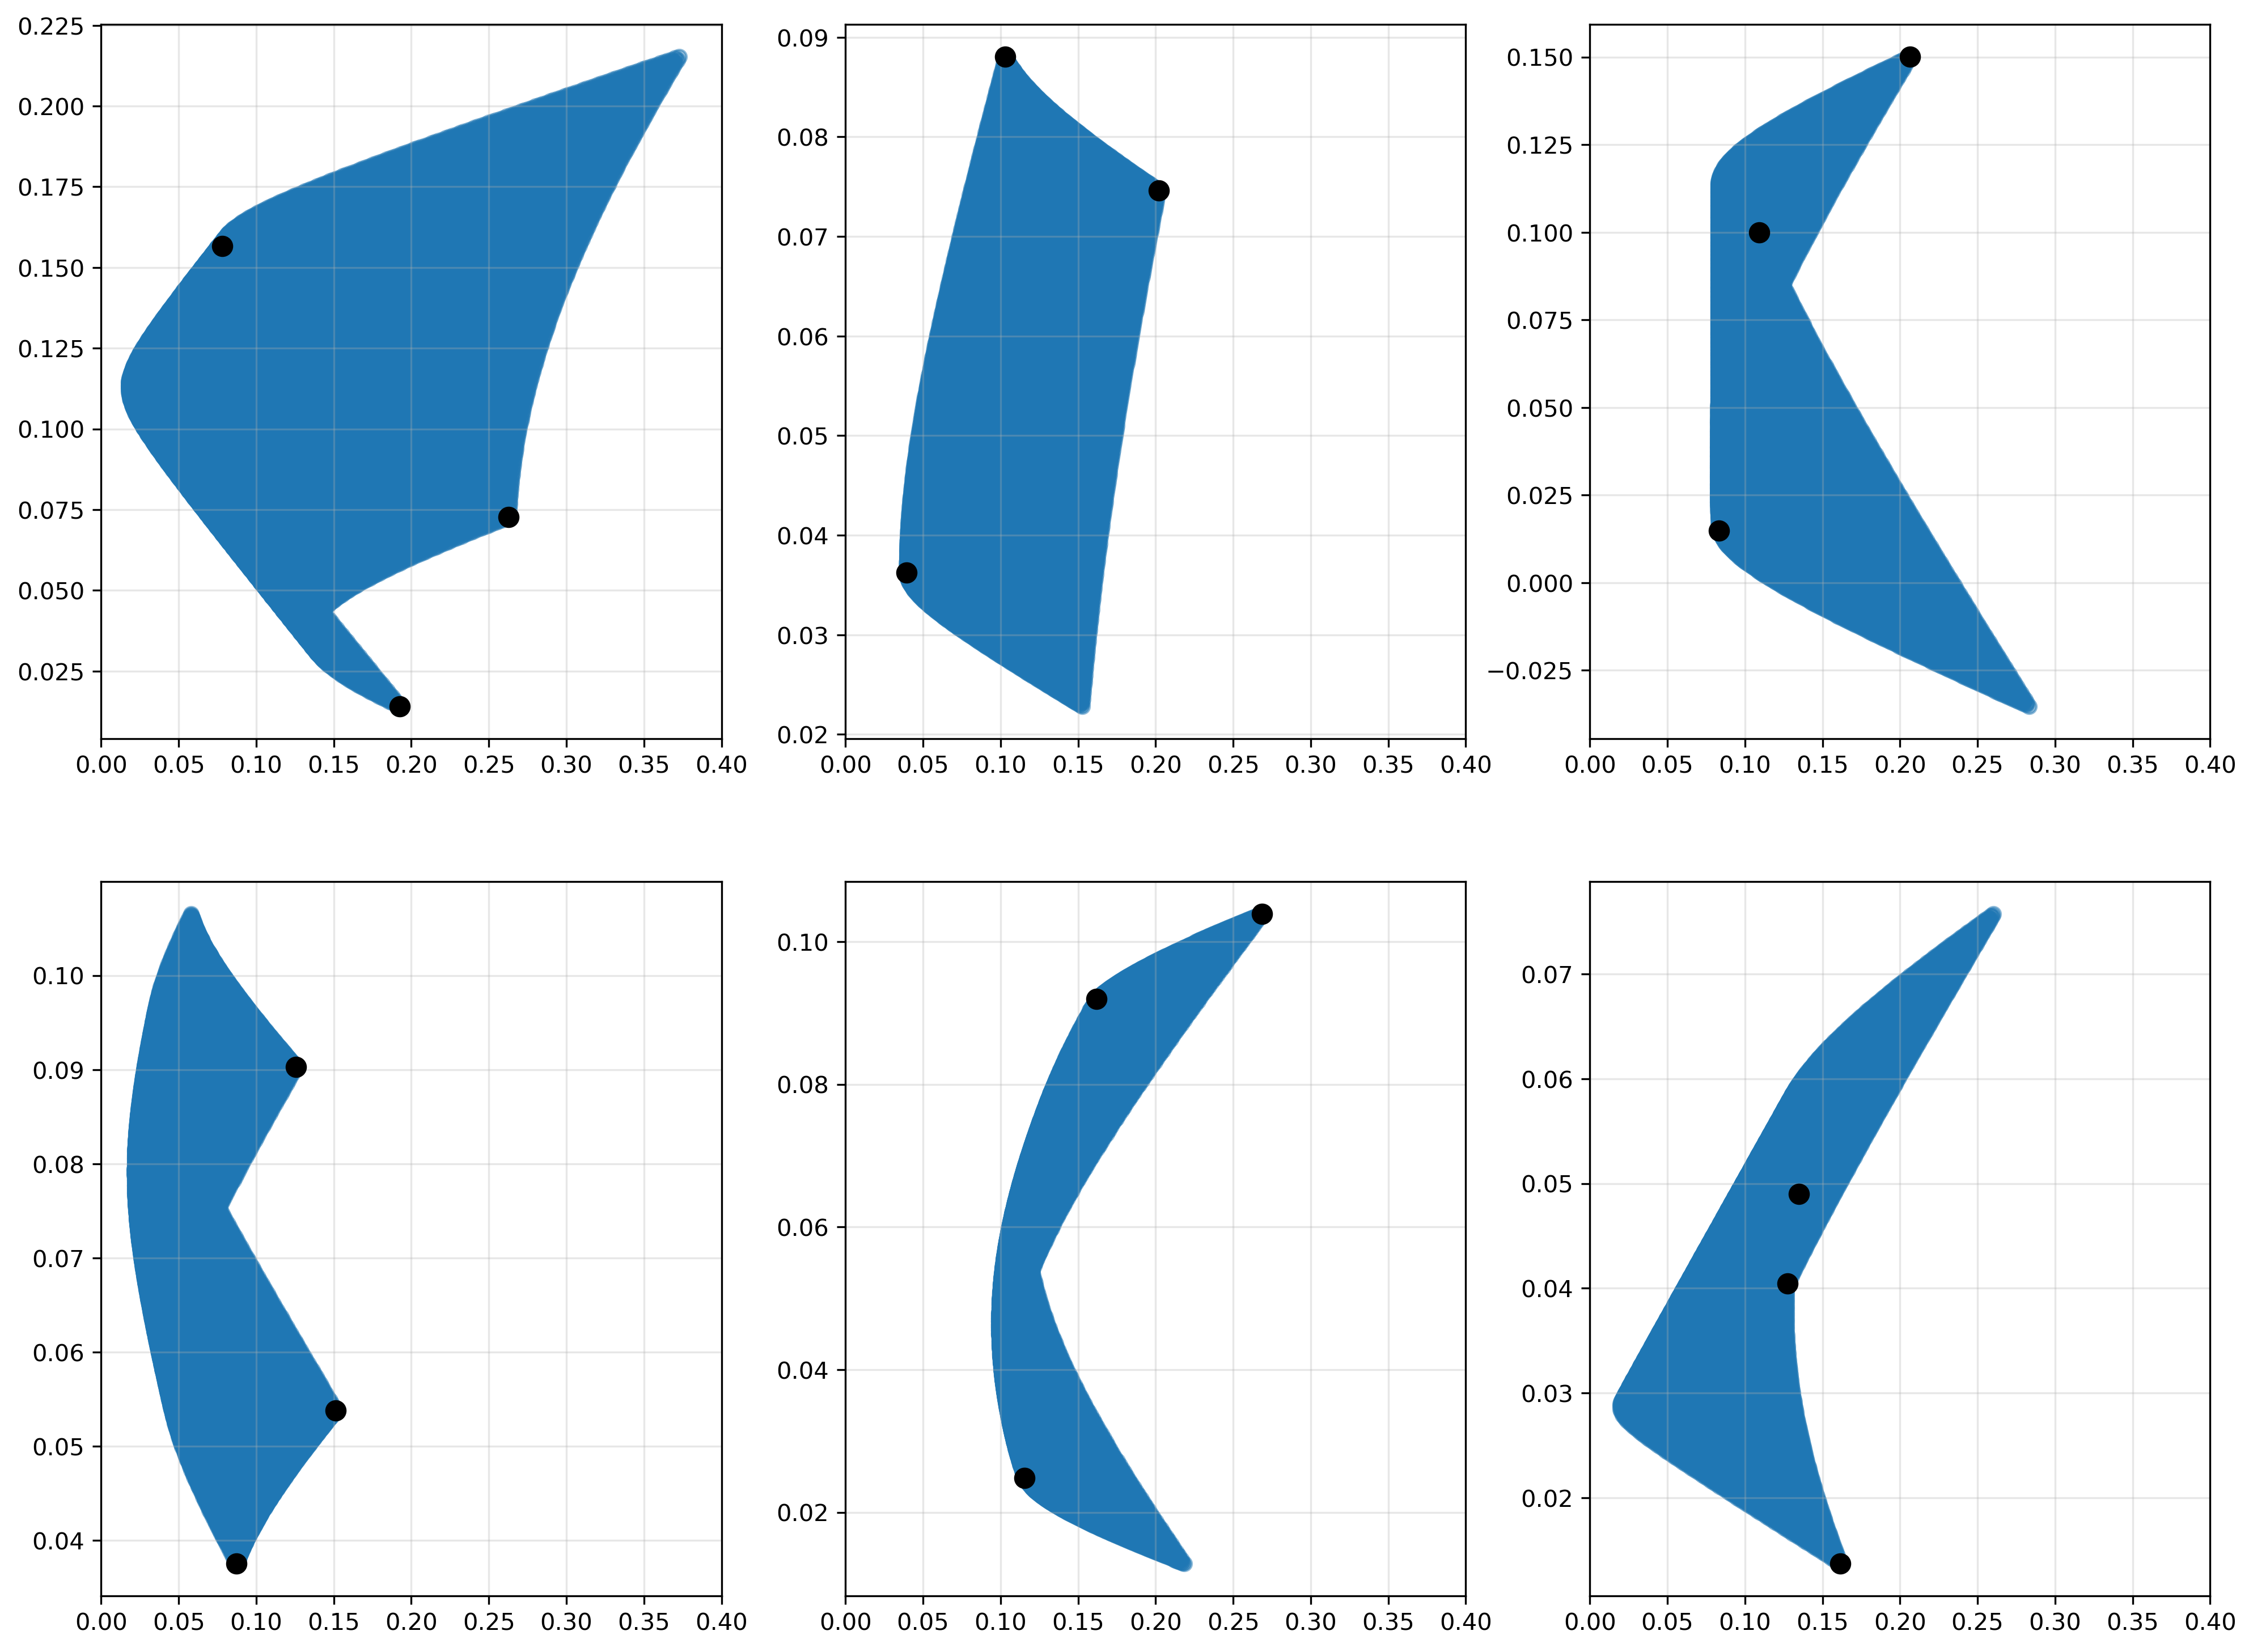

In [10]:
rng = np.random.default_rng(121212)

fig, axes = plt.subplots(2,3,figsize=(16,12))

for ax in axes.ravel():
    μ, Σ = gen_er_sigma(3)
    
    # Sweep over weights w1,w2,w3 in [0,1]
    prets = []
    pvols = []
    for w1 in np.linspace(0,1,150):
        for w2 in np.linspace(0,1,150):
            w = np.array([w1, w2, 1-w1-w2])
            prets.append(w @ μ)
            pvols.append(np.sqrt(w @ Σ @ w))
    # plot portfolios
    ax.scatter(pvols, prets, marker='o', alpha=0.5)
    
    # plot original assets
    for i in range(3):
        ax.plot(np.sqrt(Σ[i,i]), μ[i], 'ko', markersize=8)

    ax.set_xlim(0,0.4)
    ax.grid(alpha=0.3)
plt.show()

## More assets

As we add more assets, it becomes much more computationally demanding to look at all possible combinations of weights. Instead, we can form portfolios randomly to see what sort of diversification benefits we see.

In [11]:
def random_ports(μ, Σ, nports=100):
    '''Generate random portfolios given an expected return
        vector and covariance matrix
    '''
    n = μ.shape[0]
    prets = []; pvols = []
    for i in range(nports):
        w = rng.uniform(size=n)
        w /= w.sum()
        prets.append(float(w @ μ))
        pvols.append(np.sqrt(w @ Σ @ w))
    prets = np.array(prets)
    pvols = np.array(pvols)
    return(prets,pvols)

In [12]:
N = 10

# generate expected return and covariance
μ, Σ = gen_er_sigma(N)

# generate 2500 random portfolios
prets, pvols = random_ports(μ, Σ, nports=1000)

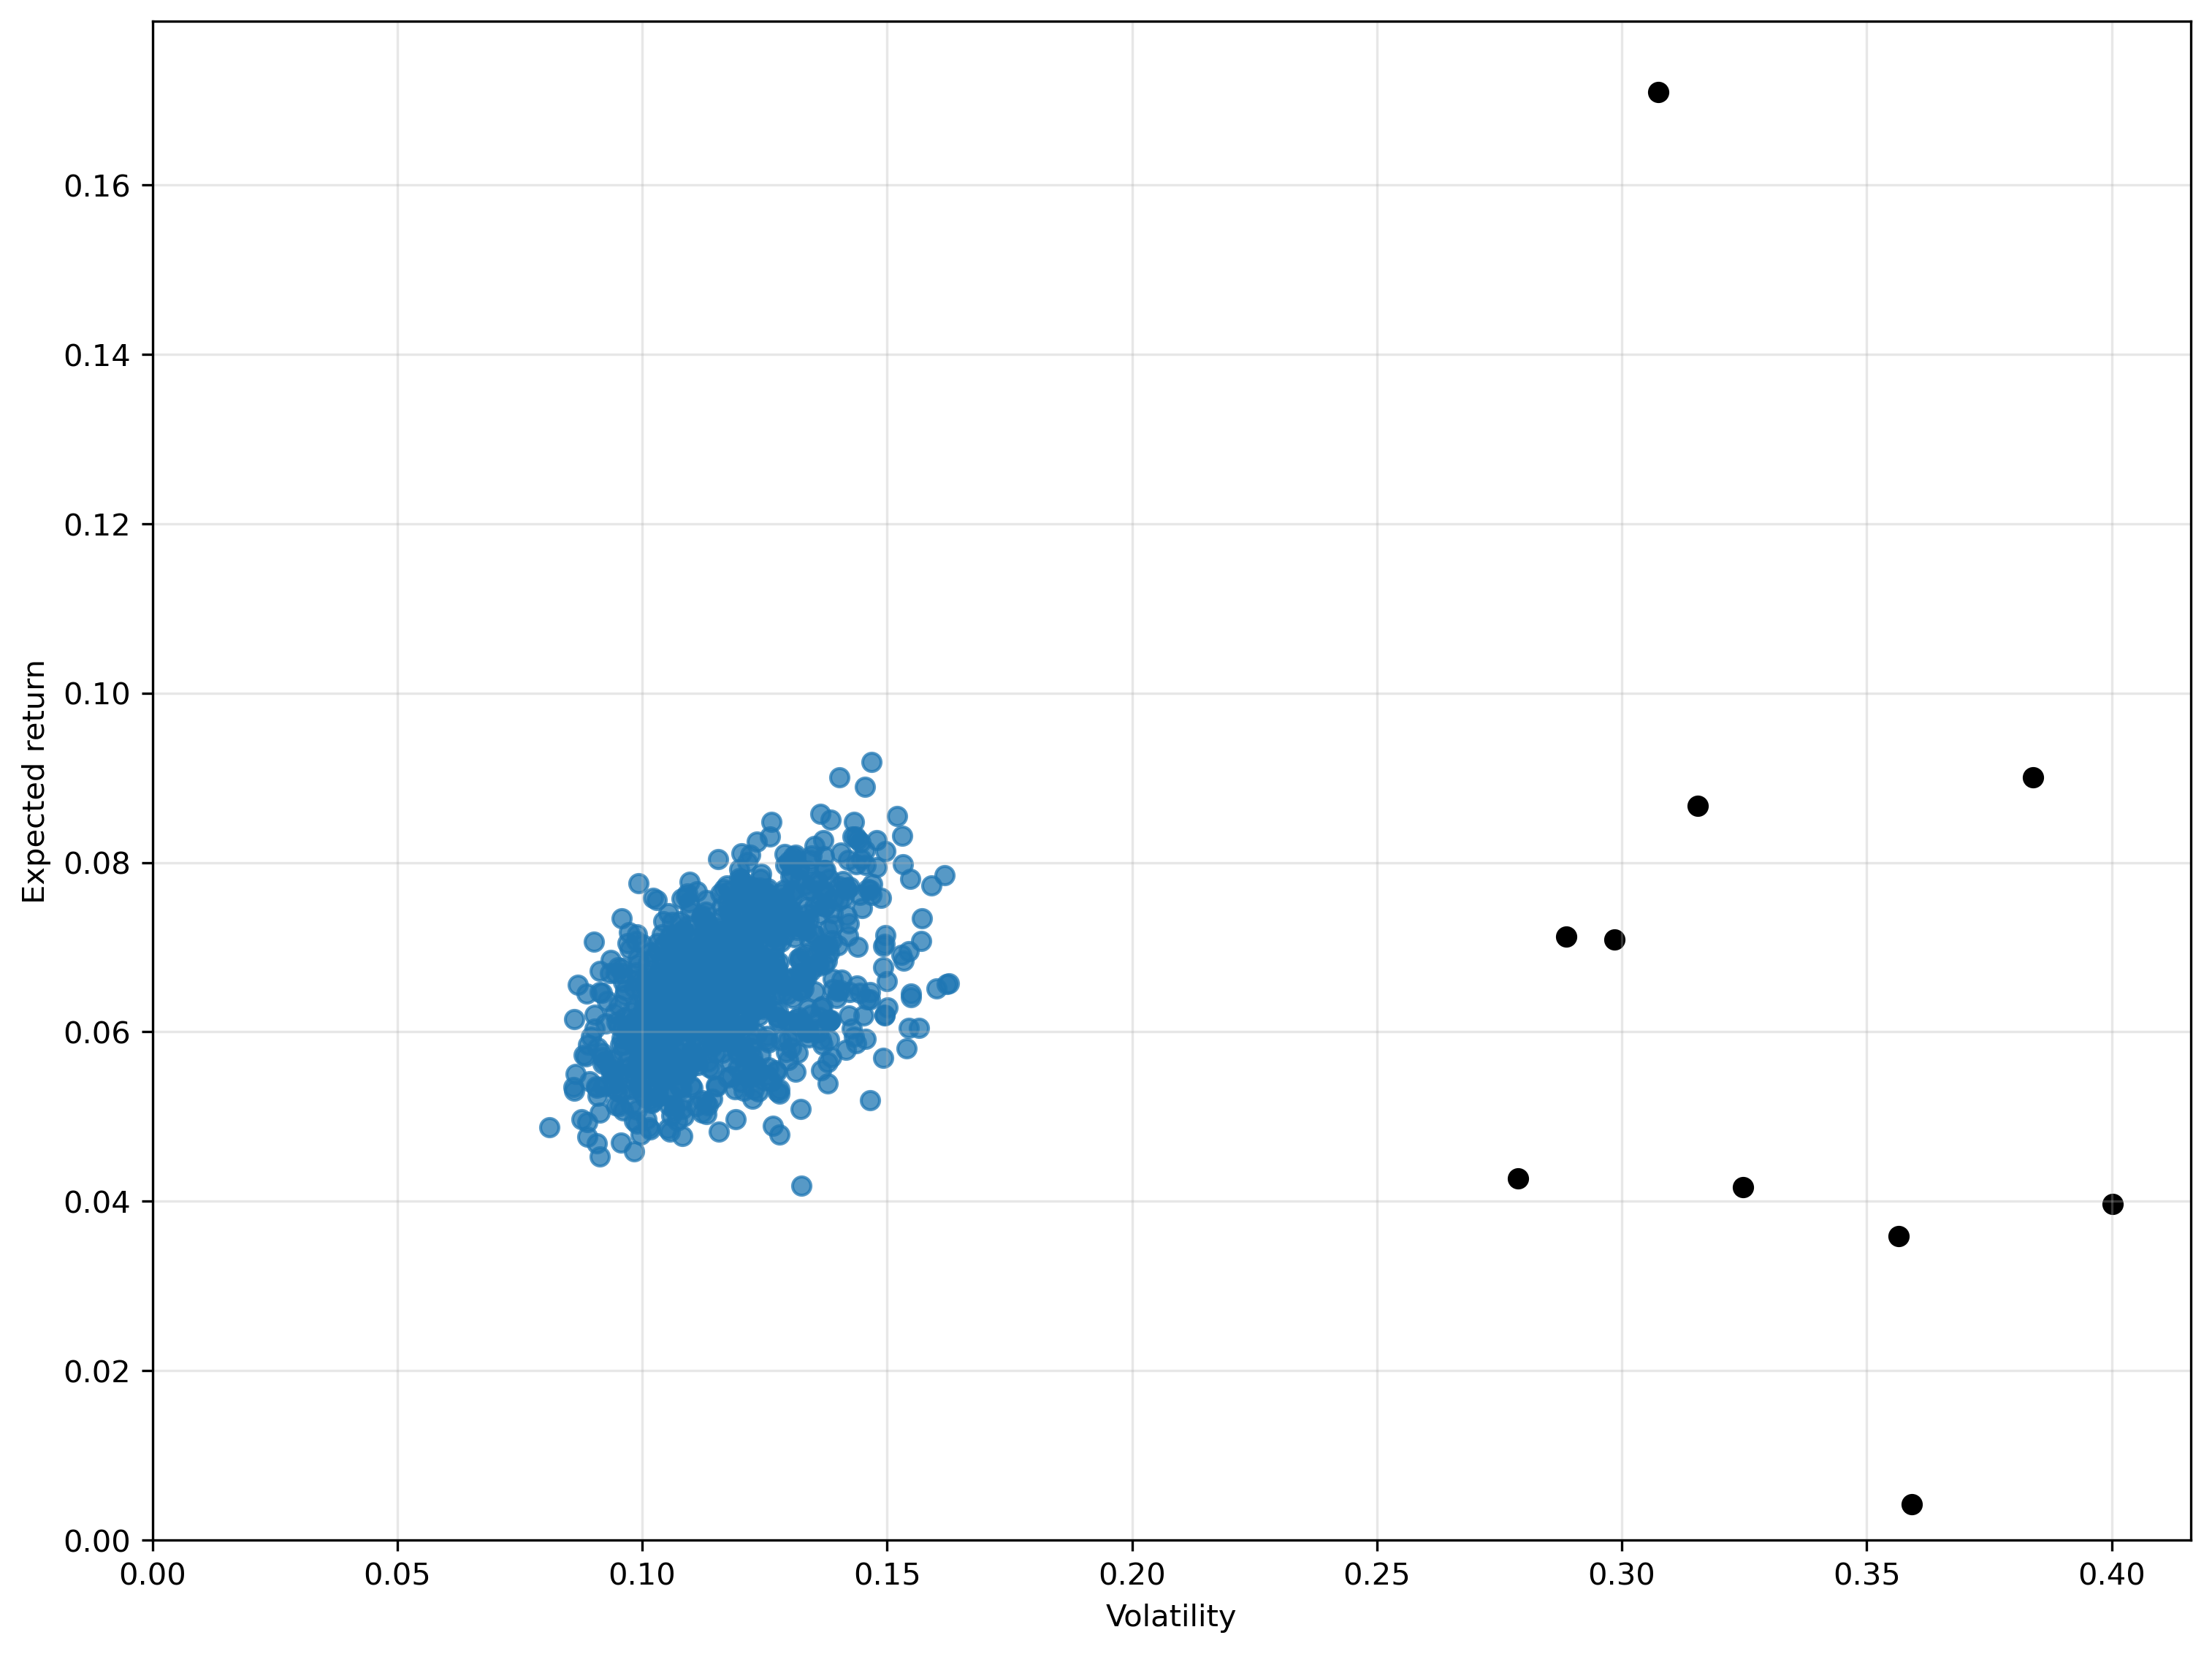

In [13]:
fig, ax = plt.subplots()

for i in range(len(μ)):
    ax.scatter(np.sqrt(Σ[i,i]), μ[i], color='k')

ax.scatter(pvols, prets, alpha=0.75, marker='o')

ax.set_xlabel('Volatility')
ax.set_ylabel('Expected return')

ax.set_xlim(0,None)
ax.set_ylim(0,None)
ax.grid(alpha=0.3)
plt.show()

## What else do investors care about?

When we plot assets in volatility–return space, we are implicitly assuming that these are the only things investors care about. Certainly that is not right. Investors may not want to buy shares of a company that pollutes the environment, sells weapons to oppressive regimes, or uses suppliers that rely on child labor. In fact, {cite:ts}`hong2009price` find that so-called "sin" stocks, including firms that produce tabacco, and alcohol, and gaming, have historically earned higher returns, perhaps due to some investors' unwillingness to buy these companies. (More recently, {cite:ts}`blitz2017sin` dispute this evidence.)

Investors may also care about statistical features of stocks other than simply the expected return and volatility. Other moments, such as skewness and kurtosis, may be important. Indeed, {cite:ts}`kumar2009gambles` finds that individual investors prefer stocks with "lotter-like" features such as a low probability of a high return.